In [50]:
from google.colab import files
uploaded = files.upload()

Saving SC_Dams_Data_.csv to SC_Dams_Data_ (2).csv


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import xgboost as xgb
from sklearn.model_selection import train_test_split
import shap

In [52]:
df2 = pd.read_csv("SC_Dams_Data_.csv")


In [53]:
df = df2

In [54]:
df.head()

,Record ID,Name,NID ID,Eligible_For_Hazard_Grant,Primary Owner Type,Primary Purpose,latitude,longitude,City,County,...,White_Alone_Tract_Pct,Black_Alone_Tract,Black_Alone_Tract_Pct,Majority_Race_Tract,Total_Population_Block,White_Alone_Block,White_Alone_Block_Pct,Black_Alone_Block,Black_Alone_Block_PCT,Majority_Race_Block
0,1,Nederhof Forestry Dam 1,SCD5004,Ineligible,State,Recreation,32.497600,-81.147600,Tillman,Jasper,...,47.51%,2076,41.13%,Mixed,0,0,0.00%,0,0.00%,No Population
1,2,Dutchman Correctional Dam,SC02183,Ineligible,State,Recreation,34.705900,-81.839200,Enoree,Spartanburg,...,73.30%,574,21.93%,White,18,16,88.89%,1,5.56%,White
2,3,Lake Caldwell Lower Dam,SCD5073,Ineligible,NaN,NaN,35.127816,-82.378052,Travelers Rest,Greenville,...,94.71%,24,0.59%,White,87,80,91.95%,2,2.30%,White
3,4,Hutto Pond Dam,SC02523,Ineligible,Private,Recreation,33.583500,-80.837300,Orangeburg,Orangeburg,...,26.53%,1363,70.22%,Black,10,4,40.00%,6,60.00%,Black
4,5,Zelene Smith Pond Dam,SC01120,Ineligible,Private,Irrigation,33.786000,-81.817800,Johnston,Edgefield,...,44.15%,1829,44.10%,Mixed,47,46,97.87%,0,0.00%,White


In [55]:
# Summary of numerical columns
df.describe()

,Record ID,latitude,longitude,Zip_Code,NID Height (Ft),Year Completed,NID Storage (Acre-Ft),Normal Storage (Acre-Ft),Inspection Frequency_Years,Tract_Code,Block_Code,Tract_Code_2010,Total_Population_Tract,White_Alone_Tract,Black_Alone_Tract,Total_Population_Block,White_Alone_Block,Black_Alone_Block
count,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,1911.000000,2203.000000,2184.000000,2194.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000,2203.000000
mean,1102.000000,34.180336,-81.294362,29430.269178,22.822969,1957.825222,444.408516,232.419538,3.946673,399309.086246,1888.742624,398879.562869,3820.170676,2447.018157,1026.174308,83.999092,60.585565,17.175670
std,636.095643,0.610810,0.892688,289.320086,11.581072,27.314185,2774.126694,1871.128445,1.356069,461174.051307,954.838834,461081.112047,1567.935703,1280.636757,843.411923,164.922099,117.593213,62.684022
min,1.000000,32.191600,-83.290600,29001.000000,5.000000,1800.000000,5.000000,0.000000,2.000000,100.000000,1000.000000,100.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,551.500000,33.704000,-81.967400,29134.000000,15.000000,1952.000000,67.000000,41.000000,2.000000,11500.000000,1025.000000,11500.000000,2730.000000,1587.000000,357.000000,9.000000,5.000000,0.000000
50%,1102.000000,34.204000,-81.259700,29461.000000,21.000000,1960.000000,101.000000,60.000000,5.000000,23202.000000,2005.000000,23202.000000,3723.000000,2220.000000,865.000000,30.000000,21.000000,2.000000
75%,1652.500000,34.712500,-80.740850,29685.000000,28.000000,1971.000000,202.000000,114.000000,5.000000,950700.000000,2072.000000,950700.000000,4656.000000,3203.000000,1398.500000,85.000000,63.000000,10.000000
max,2203.000000,35.196800,-78.595600,29945.000000,175.000000,2016.000000,80648.000000,66931.000000,5.000000,980100.000000,5091.000000,980100.000000,10964.000000,7820.000000,6281.000000,2181.000000,1981.000000,1189.000000


In [56]:
df.rename(columns={
    'Hazard Potential Classification': 'Hazard_Class',
    'Condition Assessment': 'Condition'
}, inplace=True)

In [57]:
df['White_Alone_Tract_Pct'] = df['White_Alone_Tract_Pct'].str.rstrip('%').astype(float)
df['Black_Alone_Tract_Pct'] = df['Black_Alone_Tract_Pct'].str.rstrip('%').astype(float)
# Define binning function
def bin_percentages(value):
    if value == 0:  # Preserve 0 as is
        return 0
    else:
        return np.floor(value / 10) * 10

# Apply binning function to create grouped columns
df['White_Alone_Tract_Pct_Binned'] = df['White_Alone_Tract_Pct'].apply(bin_percentages)
df['Black_Alone_Tract_Pct_Binned'] = df['Black_Alone_Tract_Pct'].apply(bin_percentages)

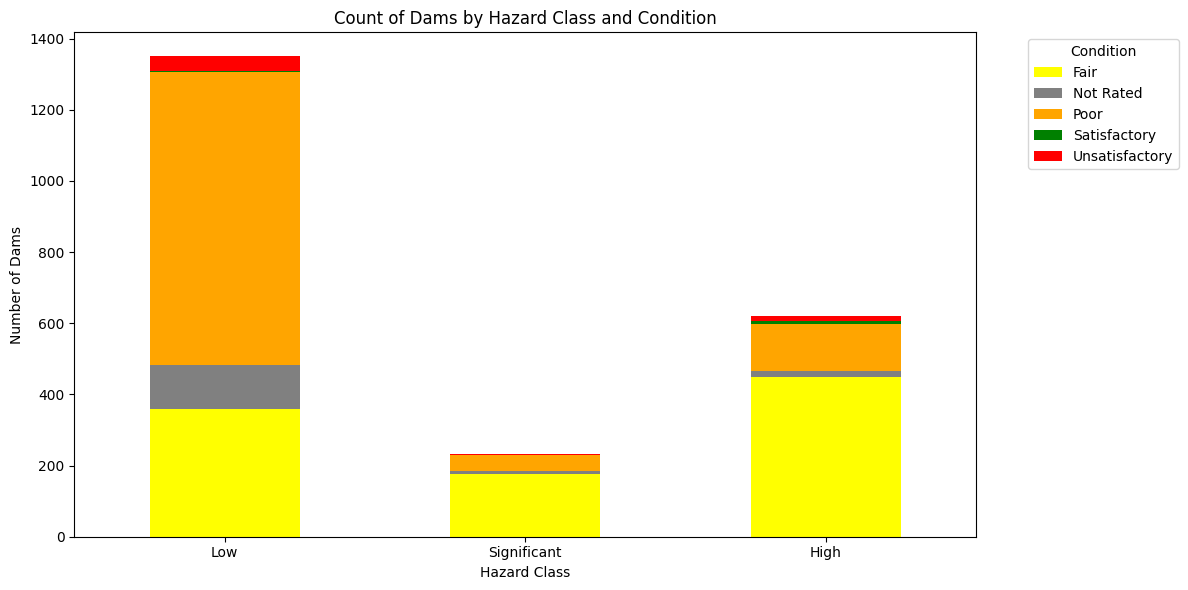

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by Hazard_Class and Condition
hazard_condition_summary = df.groupby(['Hazard_Class', 'Condition']).size().reset_index(name='Count')

# Pivot the data for visualization
hazard_condition_pivot = hazard_condition_summary.pivot(index='Hazard_Class', columns='Condition', values='Count').fillna(0)

# Reorder the rows for Hazard_Class (right to left: Low, Significant, High)
hazard_condition_pivot = hazard_condition_pivot.reindex(index=['High', 'Significant', 'Low'])

# colors for each Condition
colors = {
    'Not Rated': 'gray',
    'Unsatisfactory': 'red',
    'Poor': 'orange',
    'Fair': 'yellow',
    'Satisfactory': 'green'
}

# Plot the stacked bar chart with custom colors
hazard_condition_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), color=[colors[col] for col in hazard_condition_pivot.columns])

plt.title('Count of Dams by Hazard Class and Condition')
plt.ylabel('Number of Dams')
plt.xlabel('Hazard Class')
plt.xticks(rotation=0)  # Keep Hazard_Class labels horizontal
plt.legend(title='Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().invert_xaxis()  # Reverse the order of the Hazard_Class
plt.tight_layout()


plt.show()


In [59]:
# Group data by Hazard_Class and Condition
hazard_condition_summary = df.groupby(['Hazard_Class', 'Condition']).size().reset_index(name='Count')

# Pivot data
hazard_condition_pivot = hazard_condition_summary.pivot(index='Hazard_Class', columns='Condition', values='Count').fillna(0)

# Print table
print("Table of Hazard and Condition Combinations:")
print(hazard_condition_pivot)


Table of Hazard and Condition Combinations:
Condition      Fair  Not Rated   Poor  Satisfactory  Unsatisfactory
Hazard_Class                                                       
High          449.0       16.0  134.0           6.0            15.0
Low           358.0      124.0  823.0           4.0            41.0
Significant   175.0       10.0   46.0           0.0             2.0


Summary of EAP Plans by Majority Race (High Hazard):
EAP Prepared          No  Yes
Majority_Race_Tract          
Black                 18   61
Mixed                 15   50
White                139  337


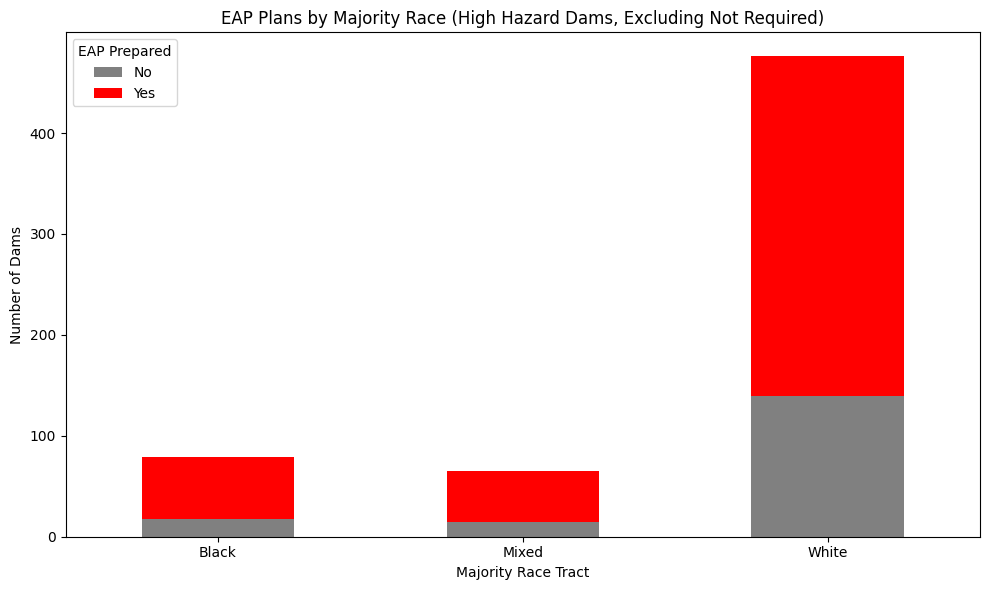

In [60]:
# Filter dataset for High Hazard Class and exclude 'Not Required' EAPs
high_hazard_df = df[(df['Hazard_Class'] == 'High') & (df['EAP Prepared'] != 'Not Required')]

# Group by Majority Race and EAP Prepared status
high_hazard_eap_summary = high_hazard_df.groupby(['Majority_Race_Tract', 'EAP Prepared']).size().reset_index(name='Count')

# Pivot for visualization
high_hazard_eap_pivot = high_hazard_eap_summary.pivot(index='Majority_Race_Tract', columns='EAP Prepared', values='Count').fillna(0)

# Print summary table
print("Summary of EAP Plans by Majority Race (High Hazard):")
print(high_hazard_eap_pivot)

# Visualize difference
high_hazard_eap_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['grey', 'red'])
plt.title('EAP Plans by Majority Race (High Hazard Dams, Excluding Not Required)')
plt.ylabel('Number of Dams')
plt.xlabel('Majority Race Tract')
plt.xticks(rotation=0)
plt.legend(title='EAP Prepared')
plt.tight_layout()
plt.show()


Summary of EAP Plans by Majority Race (Significant Hazard):
EAP Prepared         No  Yes
Majority_Race_Tract         
Black                 6   27
Mixed                 2   32
White                30  136


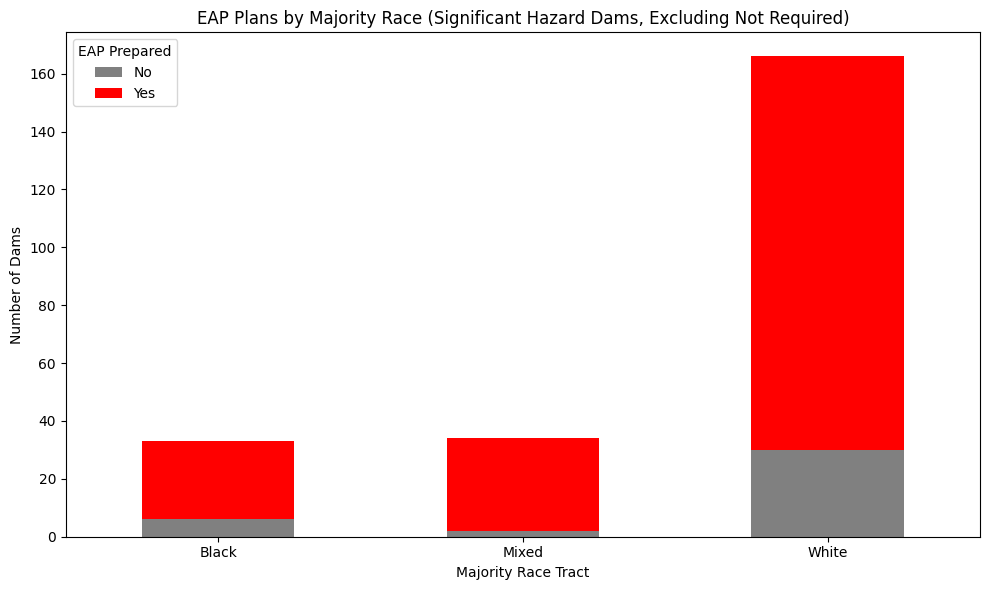

In [61]:
# Filter dataset for Significant Hazard Class and exclude 'Not Required' EAPs
significant_hazard_df = df[(df['Hazard_Class'] == 'Significant') & (df['EAP Prepared'] != 'Not Required')]

# Group by Majority Race and EAP Prepared status
significant_hazard_eap_summary = significant_hazard_df.groupby(['Majority_Race_Tract', 'EAP Prepared']).size().reset_index(name='Count')

# Pivot for visualization
significant_hazard_eap_pivot = significant_hazard_eap_summary.pivot(index='Majority_Race_Tract', columns='EAP Prepared', values='Count').fillna(0)

# Print the summary table
print("Summary of EAP Plans by Majority Race (Significant Hazard):")
print(significant_hazard_eap_pivot)

# Visualize the difference
significant_hazard_eap_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['grey', 'red'])
plt.title('EAP Plans by Majority Race (Significant Hazard Dams, Excluding Not Required)')
plt.ylabel('Number of Dams')
plt.xlabel('Majority Race Tract')
plt.xticks(rotation=0)
plt.legend(title='EAP Prepared')
plt.tight_layout()
plt.show()


In [62]:
# Calculate percentages for High Hazard
high_hazard_df = df[(df['Hazard_Class'] == 'High') & (df['EAP Prepared'] != 'Not Required')]
high_hazard_summary = high_hazard_df.groupby(['Majority_Race_Tract', 'EAP Prepared']).size().unstack(fill_value=0)
high_hazard_percentages = (high_hazard_summary.T / high_hazard_summary.sum(axis=1)).T * 100
print("High Hazard EAP Percentages:")
print(high_hazard_percentages)

# Calculate percentages for Significant Hazard
significant_hazard_df = df[(df['Hazard_Class'] == 'Significant') & (df['EAP Prepared'] != 'Not Required')]
significant_hazard_summary = significant_hazard_df.groupby(['Majority_Race_Tract', 'EAP Prepared']).size().unstack(fill_value=0)
significant_hazard_percentages = (significant_hazard_summary.T / significant_hazard_summary.sum(axis=1)).T * 100
print("Significant Hazard EAP Percentages:")
print(significant_hazard_percentages)


High Hazard EAP Percentages:
EAP Prepared                No        Yes
Majority_Race_Tract                      
Black                22.784810  77.215190
Mixed                23.076923  76.923077
White                29.201681  70.798319
Significant Hazard EAP Percentages:
EAP Prepared                No        Yes
Majority_Race_Tract                      
Black                18.181818  81.818182
Mixed                 5.882353  94.117647
White                18.072289  81.927711


In [63]:
# Define conditions for each category
conditions = [
    # Category 0: Low hazard with satisfactory or fair conditions
    (df['Hazard_Class'] == 'Low') &
    (df['Condition'].isin(['Satisfactory', 'Fair'])),

    # Category 1: High hazard with satisfactory OR low hazard with poor or not rated
    ((df['Hazard_Class'] == 'High') &
     (df['Condition'] == 'Satisfactory')) |
    ((df['Hazard_Class'] == 'Low') &
     (df['Condition'].isin(['Poor', 'Not Rated']))),

    # Category 2: Significant hazard with fair condition OR low hazard with unsatisfactory
    ((df['Hazard_Class'] == 'Significant') &
     (df['Condition'] == 'Fair')) |
    ((df['Hazard_Class'] == 'Low') &
     (df['Condition'] == 'Unsatisfactory')),

    # Category 3: High hazard with fair condition
    (df['Hazard_Class'] == 'High') &
    (df['Condition'] == 'Fair'),

    # Category 4: Significant hazard with poor, unsatisfactory, or not rated condition
    (df['Hazard_Class'] == 'Significant') &
    (df['Condition'].isin(['Poor', 'Unsatisfactory', 'Not Rated'])),

    # Category 5: High hazard with poor, unsatisfactory, or not rated condition
    (df['Hazard_Class'] == 'High') &
    (df['Condition'].isin(['Poor', 'Unsatisfactory', 'Not Rated']))
]

# Define the ordinal numerical values
categories = [0, 1, 2, 3, 4, 5]

# Apply conditions  assign numerical values
df['Risk_Ord'] = np.select(conditions, categories, default=-1)  # Use -1 for "Unknown" cases

# Verify the distribution
print(df['Risk_Ord'].value_counts())


Risk_Ord
1    953
3    449
0    362
2    216
5    165
4     58
Name: count, dtype: int64


In [64]:
# Fix categorical columns
categorical_cols = ['NID Height Category', 'Year Completed Category',
                    'Hazard_Class', 'Condition',
                    'Majority_Race_Tract', 'Majority_Race_Block', 'Eligible_For_Hazard_Grant', 'EAP Prepared']
for col in categorical_cols:
    df[col] = df[col].astype('category')


<ipython-input-65-19357fe4986f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_race_disadvantaged = df.groupby(['Majority_Race_Tract', 'Disadvantaged_Census_Tract', 'Risk_Ord']).size().reset_index(name='Count')
<ipython-input-65-19357fe4986f>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  risk_race_disadvantaged['Proportion'] = risk_race_disadvantaged.groupby(['Majority_Race_Tract', 'Disadvantaged_Census_Tract'])['Count'].transform(lambda x: x / x.sum())


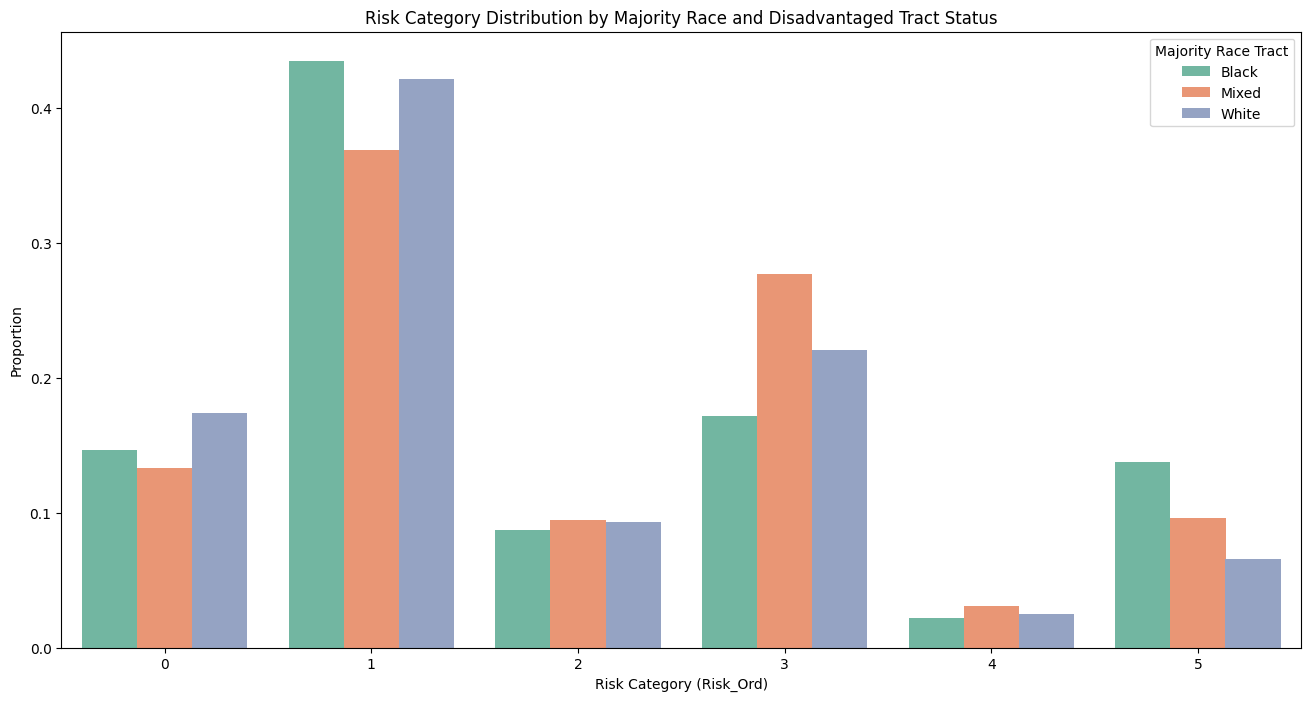

In [65]:
# Group by Majority_Race_Tract, Disadvantaged_Census_Tract, and Risk_Ord to calculate counts
risk_race_disadvantaged = df.groupby(['Majority_Race_Tract', 'Disadvantaged_Census_Tract', 'Risk_Ord']).size().reset_index(name='Count')

# Normalize counts to calculate proportions
risk_race_disadvantaged['Proportion'] = risk_race_disadvantaged.groupby(['Majority_Race_Tract', 'Disadvantaged_Census_Tract'])['Count'].transform(lambda x: x / x.sum())

# Plot
plt.figure(figsize=(16, 8))
sns.barplot(
    data=risk_race_disadvantaged,
    x='Risk_Ord',
    y='Proportion',
    hue='Majority_Race_Tract',
    errorbar=None,
    palette='Set2'
)
plt.title('Risk Category Distribution by Majority Race and Disadvantaged Tract Status')
plt.xlabel('Risk Category (Risk_Ord)')
plt.ylabel('Proportion')
plt.legend(title='Majority Race Tract')
plt.show()

In [66]:
print("Median White Population (%):", df['White_Alone_Tract_Pct'].median())
print("Median Black Population (%):", df['Black_Alone_Tract_Pct'].median())

Median White Population (%): 65.68
Median Black Population (%): 25.22


In [67]:
print("Majority Race Distribution:\n", df['Majority_Race_Tract'].value_counts())

Majority Race Distribution:
 Majority_Race_Tract
White    1626
Black     325
Mixed     252
Name: count, dtype: int64


In [68]:
df['Dam_Age'] = 2024 - df['Year Completed']

In [69]:
df.drop(columns=['Record ID', 'Name', 'NID ID', 'City', 'State', 'Zip_Code',
                 'Congressional District', 'Data Last Updated',
                 'Last Inspection Date', 'Hazard_And_Condition', 'Primary Purpose', 'Primary Owner Type', 'latitude', 'longitude', 'Tract_Code', 'Block_Code', 'Tract_Code_2010', 'Hazard_Class', 'Condition', 'Year Completed', 'Year Completed Category'], inplace=True)


In [70]:
# Evaluate categorical features for association with Risk_Ord
categorical_cols = ['Eligible_For_Hazard_Grant', 'Majority_Race_Tract', 'Majority_Race_Block',
                    'NID Height Category', 'EAP Prepared', 'Disadvantaged_Census_Tract', 'White_Alone_Tract_Pct_Binned', 'Black_Alone_Tract_Pct_Binned']

for col in categorical_cols:
    contingency = pd.crosstab(df[col], df['Risk_Ord'])
    chi2, p, dof, _ = chi2_contingency(contingency)
    print(f"Chi-Square Test: {col}: p-value={p}")

Chi-Square Test: Eligible_For_Hazard_Grant: p-value=4.972258108385111e-98
Chi-Square Test: Majority_Race_Tract: p-value=0.0012729810237988037
Chi-Square Test: Majority_Race_Block: p-value=0.2176303940628847
Chi-Square Test: NID Height Category: p-value=8.21091323039719e-22
Chi-Square Test: EAP Prepared: p-value=0.0
Chi-Square Test: Disadvantaged_Census_Tract: p-value=1.2606242317420108e-18
Chi-Square Test: White_Alone_Tract_Pct_Binned: p-value=2.2191492241099167e-09
Chi-Square Test: Black_Alone_Tract_Pct_Binned: p-value=3.1693249982121983e-10


In [71]:
# Check correlation of numerical features with Risk_Ord
numerical_cols = ['NID Height (Ft)', 'NID Storage (Acre-Ft)', 'Normal Storage (Acre-Ft)',
                  'Inspection Frequency_Years', 'White_Alone_Tract_Pct', 'Black_Alone_Tract_Pct', 'Disadvantaged_Census_Tract', 'Dam_Age']
correlation = df[numerical_cols + ['Risk_Ord']].corr()
print("Correlation with Risk_Ord:")
print(correlation['Risk_Ord'].sort_values(ascending=False))


Correlation with Risk_Ord:
Risk_Ord                      1.000000
Dam_Age                       0.089226
NID Height (Ft)               0.062895
NID Storage (Acre-Ft)         0.052722
Normal Storage (Acre-Ft)      0.028043
White_Alone_Tract_Pct         0.002799
Black_Alone_Tract_Pct        -0.031100
Disadvantaged_Census_Tract   -0.136124
Inspection Frequency_Years   -0.873019
Name: Risk_Ord, dtype: float64


In [72]:
# Create df_feats
df_cols= df[['Risk_Ord','Eligible_For_Hazard_Grant', 'Majority_Race_Tract', 'EAP Prepared',
               'Disadvantaged_Census_Tract', 'White_Alone_Tract_Pct_Binned', 'Black_Alone_Tract_Pct_Binned',
               'Inspection Frequency_Years', 'Dam_Age']].copy()

print(df_cols.head())

   Risk_Ord Eligible_For_Hazard_Grant Majority_Race_Tract  EAP Prepared  \
0         1                Ineligible               Mixed  Not Required   
1         0                Ineligible               White  Not Required   
2         3                Ineligible               White            No   
3         3                Ineligible               Black           Yes   
4         1                Ineligible               Mixed  Not Required   

   Disadvantaged_Census_Tract  White_Alone_Tract_Pct_Binned  \
0                        True                          40.0   
1                       False                          70.0   
2                       False                          90.0   
3                       False                          20.0   
4                        True                          40.0   

   Black_Alone_Tract_Pct_Binned  Inspection Frequency_Years  Dam_Age  
0                          40.0                         5.0      NaN  
1                          2

In [73]:
dfb = df_cols.copy()

In [74]:
dfb = pd.get_dummies(dfb, columns=['Majority_Race_Tract'], prefix='Race', drop_first=False)
# One-hot encode EAP Prepared
dfb = pd.get_dummies(dfb, columns=['EAP Prepared'], prefix='EAP', drop_first=False)

In [75]:
dfb['Eligible_For_Hazard_Grant'] = dfb['Eligible_For_Hazard_Grant'].map({'Eligible': 1, 'Ineligible': 0})

In [76]:
# Encode boolean
dfb['Disadvantaged_Census_Tract'] = dfb['Disadvantaged_Census_Tract'].astype(int)
dfb['Race_Black'] = dfb['Race_Black'].astype(int)
dfb['Race_Mixed'] = dfb['Race_Mixed'].astype(int)
dfb['Race_White'] = dfb['Race_White'].astype(int)
dfb['EAP_No'] = dfb['EAP_No'].astype(int)
dfb['EAP_Not Required'] = dfb['EAP_Not Required'].astype(int)
dfb['EAP_Yes'] = dfb['EAP_Yes'].astype(int)
dfb['Eligible_For_Hazard_Grant'] = dfb['Eligible_For_Hazard_Grant'].astype(int)



In [77]:
X = dfb[[
    'Eligible_For_Hazard_Grant', 'Disadvantaged_Census_Tract',
    'White_Alone_Tract_Pct_Binned', 'Black_Alone_Tract_Pct_Binned',
    'Inspection Frequency_Years',
    'Race_Black', 'Race_Mixed', 'Race_White',
    'EAP_No', 'EAP_Not Required', 'EAP_Yes', 'Dam_Age'
]]
y = dfb['Risk_Ord']
 # Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Features to scale
numerical_features = [ 'Inspection Frequency_Years', 'White_Alone_Tract_Pct_Binned', 'Black_Alone_Tract_Pct_Binned','Dam_Age']

# Initialize the scaler
scaler = MinMaxScaler()

# Scale numerical features
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=35)

# Train model
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred  = rf_model.predict(X_test)


Accuracy Score: 0.6825396825396826
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.30      0.38        84
           1       0.70      0.86      0.77       173
           2       0.60      0.70      0.65        30
           3       0.79      0.86      0.82        97
           4       0.57      0.27      0.36        15
           5       0.61      0.48      0.53        42

    accuracy                           0.68       441
   macro avg       0.63      0.58      0.58       441
weighted avg       0.66      0.68      0.66       441



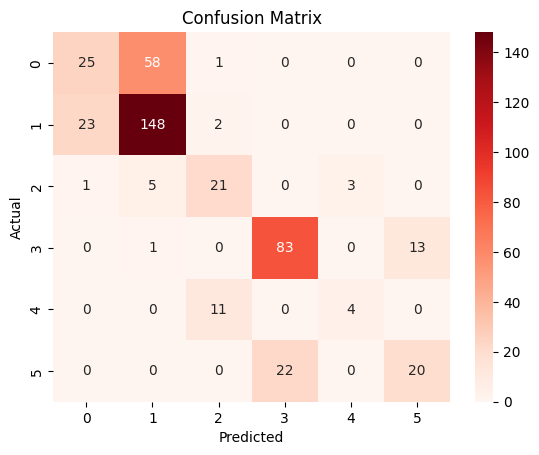

In [78]:
# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Feature Importances:
Dam_Age                         0.321466
Inspection Frequency_Years      0.301592
EAP_Not Required                0.132772
White_Alone_Tract_Pct_Binned    0.064606
Black_Alone_Tract_Pct_Binned    0.055817
EAP_Yes                         0.047102
Disadvantaged_Census_Tract      0.021677
Eligible_For_Hazard_Grant       0.021373
EAP_No                          0.020684
Race_White                      0.005263
Race_Mixed                      0.004444
Race_Black                      0.003204
dtype: float64


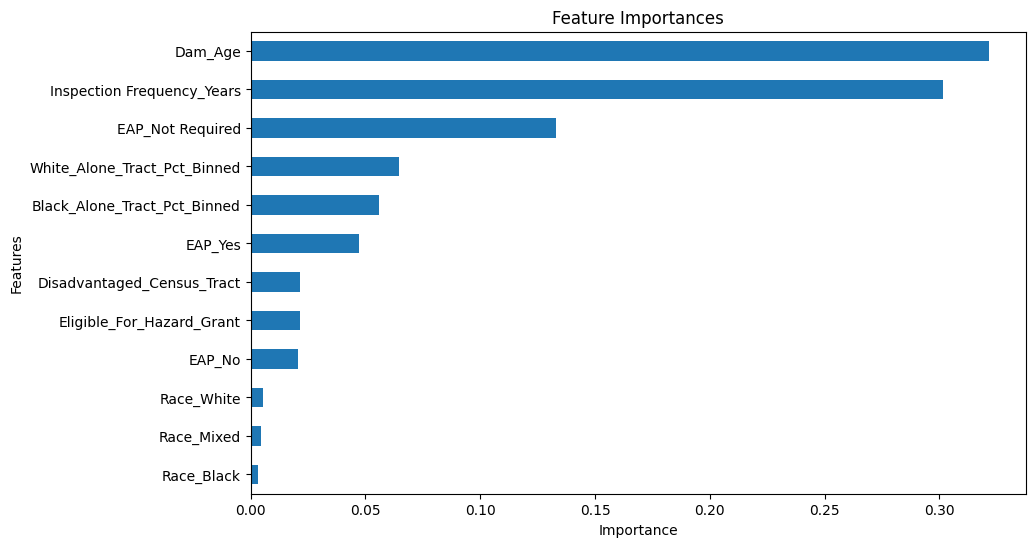

In [79]:
# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)

# Plot Feature Importance
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


In [80]:
X = dfb[[
    'Eligible_For_Hazard_Grant', 'Disadvantaged_Census_Tract',
    'Inspection Frequency_Years',
    'EAP_No', 'EAP_Not Required', 'EAP_Yes', 'Dam_Age'
]]
y = dfb['Risk_Ord']
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

# Features to scale
numerical_features = [ 'Inspection Frequency_Years', 'Dam_Age']

# Initialize scaler
scaler = MinMaxScaler()

# Scale numerical features
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=35)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred  = rf_model.predict(X_test)


Accuracy Score: 0.6870748299319728
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.14      0.22        84
           1       0.67      0.91      0.77       173
           2       0.68      0.63      0.66        30
           3       0.82      0.86      0.84        97
           4       0.64      0.47      0.54        15
           5       0.65      0.57      0.61        42

    accuracy                           0.69       441
   macro avg       0.65      0.60      0.60       441
weighted avg       0.66      0.69      0.65       441



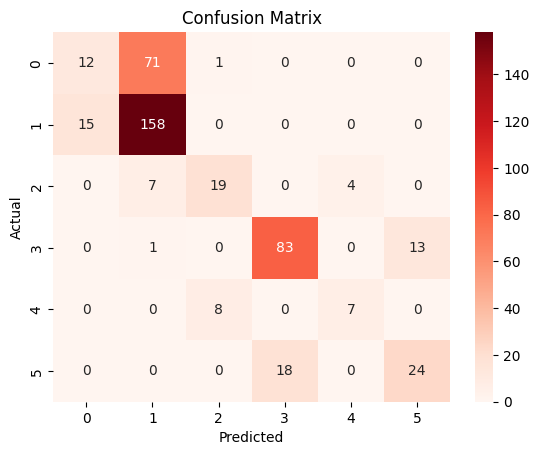

In [81]:
# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Feature Importances:
Inspection Frequency_Years    0.387021
Dam_Age                       0.288736
EAP_Not Required              0.150454
EAP_Yes                       0.081333
EAP_No                        0.040572
Eligible_For_Hazard_Grant     0.031567
Disadvantaged_Census_Tract    0.020317
dtype: float64


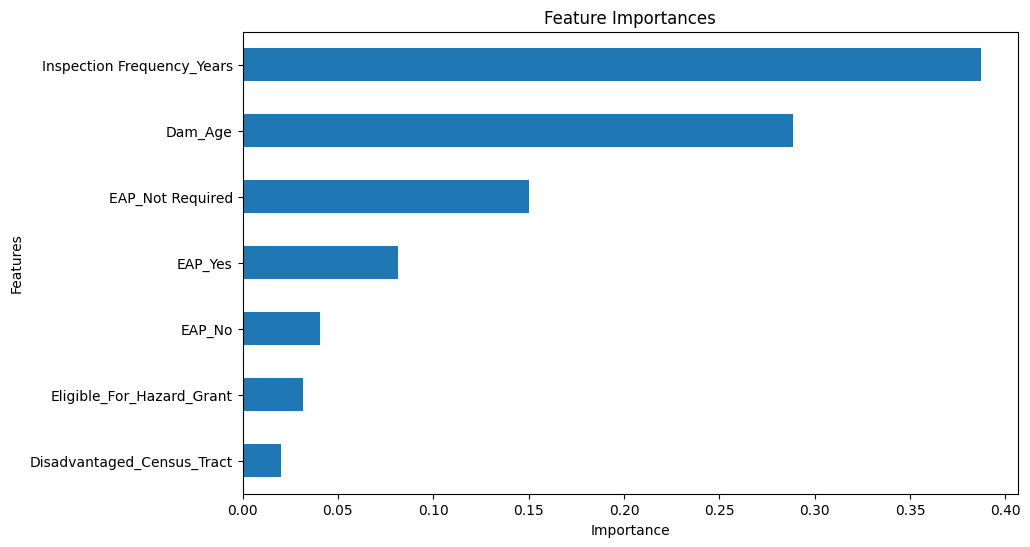

In [82]:
# Feature Importance
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:")
print(feature_importances)

# Plot Feature Importance
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()


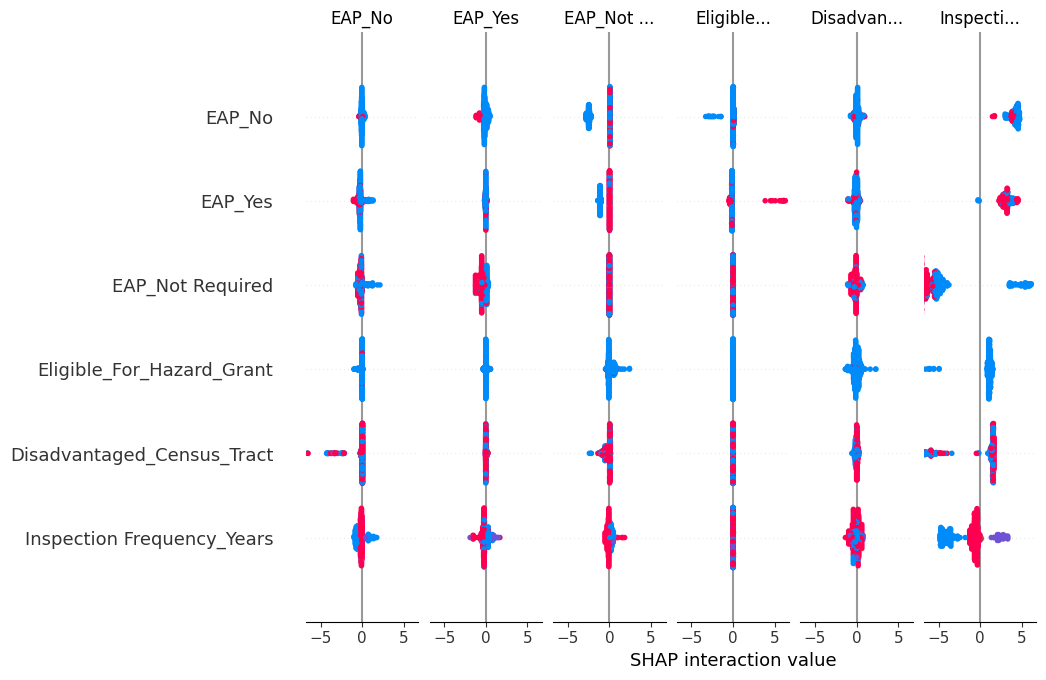

In [83]:

# Train XGBoost model
xgb_model = xgb.XGBClassifier(random_state=35)
xgb_model.fit(X_train, y_train)

# SHAP explanation
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
